In [1]:
import pandas as pd
from pathlib import Path
import urllib
import re
import string
import math
from nltk.corpus import stopwords as stopwords
from nltk.stem.porter import *
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
url_mapping = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/mapping.txt'
url_trainText = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/train_text.txt'
url_trainLabel = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/train_labels.txt'
url_testText = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/test_text.txt'
url_testLabel = 'https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/test_labels.txt'

def getText(url):
    mylist=[]
    response = urllib.request.urlopen(url)
    Text = response.read()
    Text=Text.decode("utf-8")
    lines = Text.split('\n')
    return lines[:-1]
    
mapping = getText(url_mapping)
train_text = getText(url_trainText)
train_labels = getText(url_trainLabel)
test_text = getText(url_testText)
test_labels = getText(url_testLabel)


In [3]:
df=pd.DataFrame({"tweet":train_text,"label":train_labels}) #change name to df_train
df_test = pd.DataFrame({"tweet":test_text, "label":test_labels})
pd.set_option('display.max_colwidth', None)

In [4]:
df.head(10)

,tweet,label
0,“Worry is a down payment on a problem you may never have'. Joyce Meyer. #motivation #leadership #worry,2
1,My roommate: it's okay that we can't spell because we have autocorrect. #terrible #firstworldprobs,0
2,No but that's so cute. Atsu was probably shy about photos before but cherry helped her out uwu,1
3,"Rooneys fucking untouchable isn't he? Been fucking dreadful again, depay has looked decent(ish)tonight",0
4,it's pretty depressing when u hit pan on ur favourite highlighter,3
5,@user but your pussy was weak from what I heard so stfu up to me bitch . You got to threaten him that your pregnant .,0
6,Making that yearly transition from excited and hopeful college returner to sick and exhausted pessimist. #college,3
7,Tiller and breezy should do a collab album. Rapping and singing prolly be fire,1
8,@user broadband is shocking regretting signing up now #angry #shouldofgonewithvirgin,0
9,@user Look at those teef! #growl,0


In [5]:
#def preprocessing(df):
#Remove @user so they don't get tokenized
df['tweet']=df['tweet'].apply(lambda x: re.sub('@user','', x))

df.head(10)

,tweet,label
0,“Worry is a down payment on a problem you may never have'. Joyce Meyer. #motivation #leadership #worry,2
1,My roommate: it's okay that we can't spell because we have autocorrect. #terrible #firstworldprobs,0
2,No but that's so cute. Atsu was probably shy about photos before but cherry helped her out uwu,1
3,"Rooneys fucking untouchable isn't he? Been fucking dreadful again, depay has looked decent(ish)tonight",0
4,it's pretty depressing when u hit pan on ur favourite highlighter,3
5,but your pussy was weak from what I heard so stfu up to me bitch . You got to threaten him that your pregnant .,0
6,Making that yearly transition from excited and hopeful college returner to sick and exhausted pessimist. #college,3
7,Tiller and breezy should do a collab album. Rapping and singing prolly be fire,1
8,broadband is shocking regretting signing up now #angry #shouldofgonewithvirgin,0
9,Look at those teef! #growl,0


In [6]:
#Turn all words into lowercase
df['tweet']=df['tweet'].apply(lambda x: x.lower())

df.head(10)

,tweet,label
0,“worry is a down payment on a problem you may never have'. joyce meyer. #motivation #leadership #worry,2
1,my roommate: it's okay that we can't spell because we have autocorrect. #terrible #firstworldprobs,0
2,no but that's so cute. atsu was probably shy about photos before but cherry helped her out uwu,1
3,"rooneys fucking untouchable isn't he? been fucking dreadful again, depay has looked decent(ish)tonight",0
4,it's pretty depressing when u hit pan on ur favourite highlighter,3
5,but your pussy was weak from what i heard so stfu up to me bitch . you got to threaten him that your pregnant .,0
6,making that yearly transition from excited and hopeful college returner to sick and exhausted pessimist. #college,3
7,tiller and breezy should do a collab album. rapping and singing prolly be fire,1
8,broadband is shocking regretting signing up now #angry #shouldofgonewithvirgin,0
9,look at those teef! #growl,0


In [7]:
#Remove punctuation, special characters and numbers from the tweet series. 
df['tweet'] = df['tweet'].str.replace("[^a-zA-Z]", " ")

df.head(10)

<ipython-input-7-356f1a76ae22>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace("[^a-zA-Z]", " ")


,tweet,label
0,worry is a down payment on a problem you may never have joyce meyer motivation leadership worry,2
1,my roommate it s okay that we can t spell because we have autocorrect terrible firstworldprobs,0
2,no but that s so cute atsu was probably shy about photos before but cherry helped her out uwu,1
3,rooneys fucking untouchable isn t he been fucking dreadful again depay has looked decent ish tonight,0
4,it s pretty depressing when u hit pan on ur favourite highlighter,3
5,but your pussy was weak from what i heard so stfu up to me bitch you got to threaten him that your pregnant,0
6,making that yearly transition from excited and hopeful college returner to sick and exhausted pessimist college,3
7,tiller and breezy should do a collab album rapping and singing prolly be fire,1
8,broadband is shocking regretting signing up now angry shouldofgonewithvirgin,0
9,look at those teef growl,0


In [8]:
#Remove stop words using nltk.stopwords
stop = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
df.head(10)

,tweet,label
0,worry payment problem may never joyce meyer motivation leadership worry,2
1,roommate okay spell autocorrect terrible firstworldprobs,0
2,cute atsu probably shy photos cherry helped uwu,1
3,rooneys fucking untouchable fucking dreadful depay looked decent ish tonight,0
4,pretty depressing u hit pan ur favourite highlighter,3
5,pussy weak heard stfu bitch got threaten pregnant,0
6,making yearly transition excited hopeful college returner sick exhausted pessimist college,3
7,tiller breezy collab album rapping singing prolly fire,1
8,broadband shocking regretting signing angry shouldofgonewithvirgin,0
9,look teef growl,0


In [9]:
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>4]))
#df['tweet'] = df['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)<12]))
df.head(10)

,tweet,label
0,worry payment problem never joyce meyer motivation leadership worry,2
1,roommate spell autocorrect terrible firstworldprobs,0
2,probably photos cherry helped,1
3,rooneys fucking untouchable fucking dreadful depay looked decent tonight,0
4,pretty depressing favourite highlighter,3
5,pussy heard bitch threaten pregnant,0
6,making yearly transition excited hopeful college returner exhausted pessimist college,3
7,tiller breezy collab album rapping singing prolly,1
8,broadband shocking regretting signing angry shouldofgonewithvirgin,0
9,growl,0


In [10]:
##Split dataset by labels
dfTok = df.copy()

dfAnger = df[df['label']=='0']

dfJoy = df[df['label']=='1']

dfSadness = df[df['label']=='2']

dfOptimism = df[df['label']=='3']
dfOptimism

,tweet,label
4,pretty depressing favourite highlighter,3
6,making yearly transition excited hopeful college returner exhausted pessimist college,3
11,newyork several baloch indian activists demonstrations outside headquarters demanding exporting terror india,3
21,possible changing stress difficult despair circumstantial drugs,3
40,people mourn surprised tweet suppose,3
...,...,...
3240,sadly married,3
3247,could block germantownbroncos lilleague popwarner broncos usafootball lineman,3
3249,anxiety depression worst people anxiety depression,3
3252,discouraged fucking years contact thousands tweets would tweet,3


In [11]:
#Tokenize the Tweets
#df['tweet'] = df['tweet'].apply(lambda x: x.split())
df['tokenized_tweets'] = df.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
dfAnger['tokenized_tweets'] = dfAnger.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
dfJoy['tokenized_tweets'] = dfJoy.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
dfSadness['tokenized_tweets'] = dfSadness.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
dfOptimism['tokenized_tweets'] = dfOptimism.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
#Stemming/lammetization
#stemmer = PorterStemmer()
#df['tweet'] = df['tweet'].apply(lambda x: [stemmer.stem(i) for i in x])

##Stemmed words may not be the better option.

<ipython-input-11-63d55f391aa3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAnger['tokenized_tweets'] = dfAnger.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
<ipython-input-11-63d55f391aa3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfJoy['tokenized_tweets'] = dfJoy.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
<ipython-input-11-63d55f391aa3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [12]:
#Function to create Word Cloud
def createWC(df):
    wordbank = [' '.join(map(str,x)) for x in df['tokenized_tweets']]
    wordbank = "".join(wordbank)
    wordbank.strip()
    
    wordCloud = WordCloud(width=800,height=500, random_state=1, background_color='salmon').generate(wordbank)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()

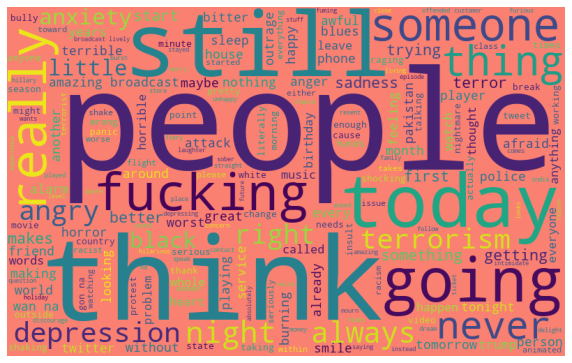

In [13]:
#Most Common words in the Dataset
createWC(df)

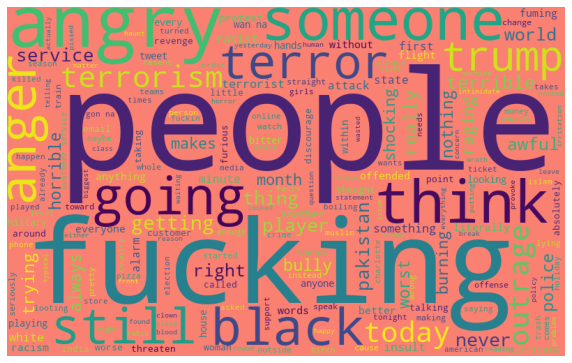

In [14]:
#Word Cloud for Anger
createWC(dfAnger)

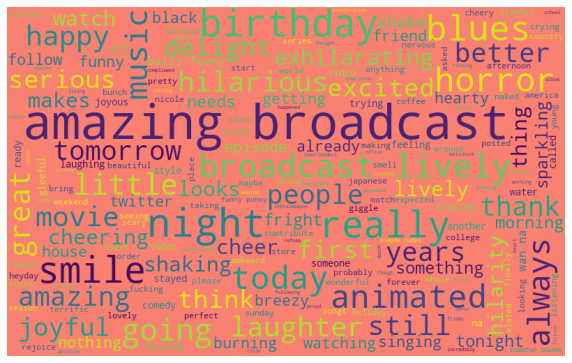

In [15]:
createWC(dfJoy)

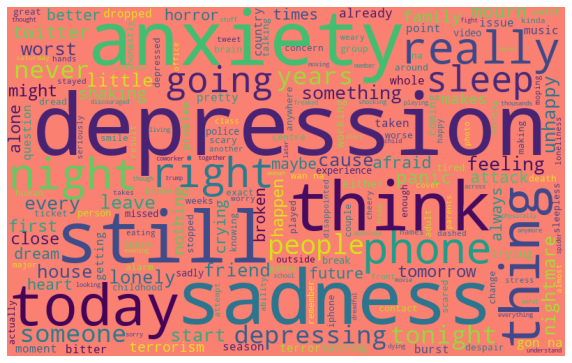

In [16]:
createWC(dfOptimism)

In [19]:
#df['tokenized_tweets2'] = df['tweet'].apply(nltk.word_tokenize) 

,tweet,label,tokenized_tweets,tokenized_tweets2
0,worry payment problem never joyce meyer motivation leadership worry,2,"[worry, payment, problem, never, joyce, meyer, motivation, leadership, worry]","[worry, payment, problem, never, joyce, meyer, motivation, leadership, worry]"
1,roommate spell autocorrect terrible firstworldprobs,0,"[roommate, spell, autocorrect, terrible, firstworldprobs]","[roommate, spell, autocorrect, terrible, firstworldprobs]"
2,probably photos cherry helped,1,"[probably, photos, cherry, helped]","[probably, photos, cherry, helped]"
3,rooneys fucking untouchable fucking dreadful depay looked decent tonight,0,"[rooneys, fucking, untouchable, fucking, dreadful, depay, looked, decent, tonight]","[rooneys, fucking, untouchable, fucking, dreadful, depay, looked, decent, tonight]"
4,pretty depressing favourite highlighter,3,"[pretty, depressing, favourite, highlighter]","[pretty, depressing, favourite, highlighter]"
...,...,...,...,...
95,assure laughter increasing anger costs arrogance westminster,0,"[assure, laughter, increasing, anger, costs, arrogance, westminster]","[assure, laughter, increasing, anger, costs, arrogance, westminster]"
96,people debating inequality within justice system existent trying aggravate,0,"[people, debating, inequality, within, justice, system, existent, trying, aggravate]","[people, debating, inequality, within, justice, system, existent, trying, aggravate]"
97,contained depression economic engine sustainability vergecon newgrandstrategy,3,"[contained, depression, economic, engine, sustainability, vergecon, newgrandstrategy]","[contained, depression, economic, engine, sustainability, vergecon, newgrandstrategy]"
98,louder,3,[louder],[louder]
